In [29]:
import cv2
import os

def calculate_mse(image1_path, image2_path):
    # Read the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Check if either image is None (failed to load)
    if image1 is None or image2 is None:
        raise ValueError("One or both images could not be loaded.")

    # Resize images to 64x64 pixels
    target_size = (64, 64)
    image1 = cv2.resize(image1, target_size)
    image2 = cv2.resize(image2, target_size)

    # Check if resized images are of the same size
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for MSE calculation.")

    # Calculate MSE
    mse = ((image1 - image2) ** 2).mean()
    return mse

def calculate_mse_between_folders(folder1, folder2, num_pairs):
    # Get a list of file names in each folder
    images1 = os.listdir(folder1)
    images2 = os.listdir(folder2)

    mse_values = []

    # Calculate MSE for each pair of images
    for i in range(min(len(images1), len(images2), num_pairs)):
        image1 = images1[i]
        image2 = images2[i]
        image1_path = os.path.join(folder1, image1)
        image2_path = os.path.join(folder2, image2)
        
        try:
            mse = calculate_mse(image1_path, image2_path)
            mse_values.append(mse)
        except ValueError as e:
            print(f"Error processing pair ({image1}, {image2}): {str(e)}")

    return mse_values

if __name__ == "__main__":
    folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"  # Replace with the path to your first folder of images
    folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"  # Replace with the path to your second folder of images
    num_pairs = 100 # Replace with the desired number of image pairs to compare

    mse_values = calculate_mse_between_folders(folder1_path, folder2_path, num_pairs)

    # Calculate the average MSE
    average_mse = sum(mse_values) / len(mse_values)
    print(f"Average Mean Squared Error (MSE) between images: {average_mse}")


Average Mean Squared Error (MSE) between images: 105.23094482421875


In [21]:


def calculate_mse(image1_path, image2_path):
    # Read the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Resize images to 64x64 pixels
    target_size = (64, 64)
    image1 = cv2.resize(image1, target_size)
    image2 = cv2.resize(image2, target_size)

    # Check if resized images are of the same size
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for MSE calculation.")

    # Calculate MSE
    mse = ((image1 - image2) ** 2).mean()
    return mse

def calculate_mse_between_folders(folder1, folder2, num_pairs):
    # Get a list of file names in each folder
    images1 = os.listdir(folder1)
    images2 = os.listdir(folder2)

    mse_values = []

    # Calculate MSE for each pair of images
    for i in range(min(len(images1), len(images2), num_pairs)):
        image1 = images1[i]
        image2 = images2[i]
        image1_path = os.path.join(folder1, image1)
        image2_path = os.path.join(folder2, image2)
        mse = calculate_mse(image1_path, image2_path)
        mse_values.append(mse)

    return mse_values

if __name__ == "__main__":
    folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"  # Replace with the path to your first folder of images
    folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"  # Replace with the path to your second folder of images
    num_pairs = 200  # Replace with the desired number of image pairs to compare

    mse_values = calculate_mse_between_folders(folder1_path, folder2_path, num_pairs)

    # Calculate the average MSE
    average_mse = sum(mse_values) / len(mse_values)
    print(f"Average Mean Squared Error (MSE) between images: {average_mse}")


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [30]:
import matplotlib.pyplot as plt

Error processing pair (annotations_train.json, 100800_8065.png): One or both images could not be loaded.
Average Mean Squared Error (MSE) between images: 106.81261649073299


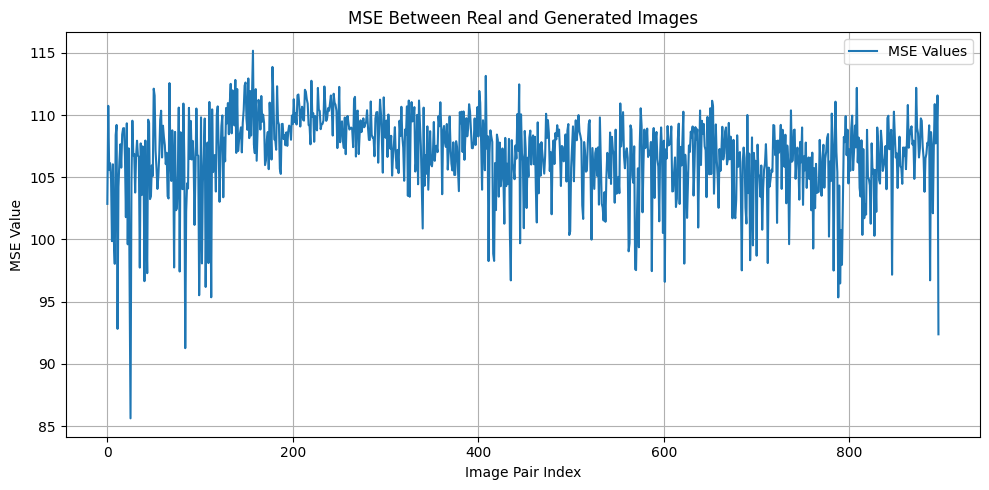

In [32]:
if __name__ == "__main__":
    folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"  # Replace with the path to your first folder of images
    folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"  # Replace with the path to your second folder of images
    num_pairs = 1000  # Replace with the desired number of image pairs to compare

    mse_values = calculate_mse_between_folders(folder1_path, folder2_path, num_pairs)

    # Calculate the average MSE
    average_mse = sum(mse_values) / len(mse_values)
    print(f"Average Mean Squared Error (MSE) between images: {average_mse}")

    # Plot the MSE values
    plt.figure(figsize=(10, 5))
    plt.plot(mse_values, label='MSE Values')
    plt.xlabel('Image Pair Index')
    plt.ylabel('MSE Value')
    plt.title('MSE Between Real and Generated Images')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [33]:
import cv2
import os
import matplotlib.pyplot as plt

def calculate_mse(image1_path, image2_path):
    # Read the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Resize images to 64x64 pixels
    target_size = (64, 64)
    image1 = cv2.resize(image1, target_size)
    image2 = cv2.resize(image2, target_size)

    # Check if resized images are of the same size
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for MSE calculation.")

    # Calculate MSE
    mse = ((image1 - image2) ** 2).mean()
    return mse

def calculate_mse_within_folder(folder, num_pairs):
    # Get a list of file names in the folder
    images = os.listdir(folder)

    mse_values = []

    # Calculate MSE for each pair of images within the folder
    for i in range(min(len(images), num_pairs)):
        for j in range(i + 1, min(len(images), num_pairs)):
            image1 = images[i]
            image2 = images[j]
            image1_path = os.path.join(folder, image1)
            image2_path = os.path.join(folder, image2)
            mse = calculate_mse(image1_path, image2_path)
            mse_values.append(mse)

    return mse_values

Average Mean Squared Error (MSE) for Folder 1: 88.7333669376052
Average Mean Squared Error (MSE) for Folder 2: 96.14358926175821


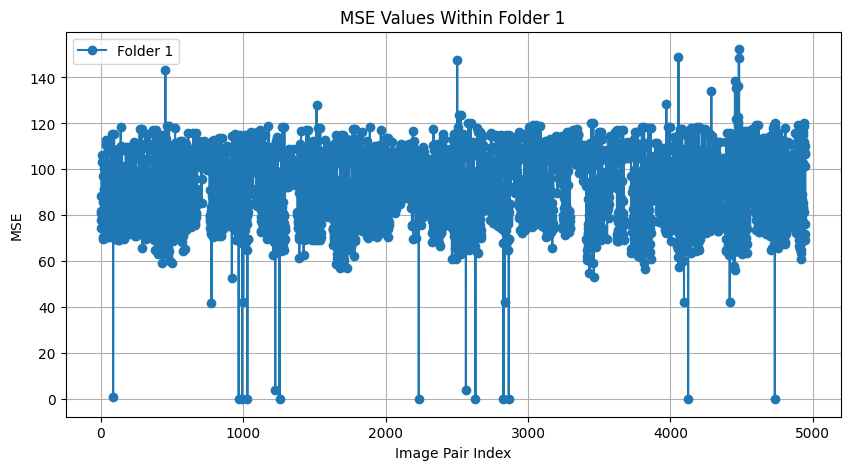

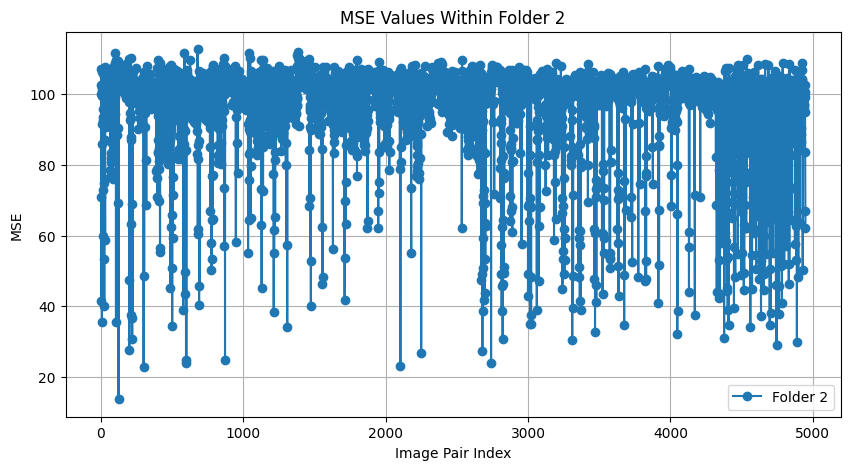

In [34]:
if __name__ == "__main__":
    folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"  # Replace with the path to your first folder of images
    folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"  # Replace with the path to your second folder of images
    num_pairs = 100  # Replace with the desired number of image pairs to compare

    mse_values_folder1 = calculate_mse_within_folder(folder1_path, num_pairs)
    mse_values_folder2 = calculate_mse_within_folder(folder2_path, num_pairs)

    # Calculate the average MSE for each folder
    average_mse_folder1 = sum(mse_values_folder1) / len(mse_values_folder1)
    average_mse_folder2 = sum(mse_values_folder2) / len(mse_values_folder2)

    print(f"Average Mean Squared Error (MSE) for Folder 1: {average_mse_folder1}")
    print(f"Average Mean Squared Error (MSE) for Folder 2: {average_mse_folder2}")

    # Plot the MSE values separately for each folder
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(mse_values_folder1)), mse_values_folder1, marker='o', linestyle='-', label='Folder 1')
    plt.title("MSE Values Within Folder 1")
    plt.xlabel("Image Pair Index")
    plt.ylabel("MSE")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(mse_values_folder2)), mse_values_folder2, marker='o', linestyle='-', label='Folder 2')
    plt.title("MSE Values Within Folder 2")
    plt.xlabel("Image Pair Index")
    plt.ylabel("MSE")
    plt.grid(True)
    plt.legend()
    plt.show()

In [35]:
%pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\sides\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths
folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"
folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"


In [ ]:
'''
# Load images from folders
def load_images_from_folder(folder_path):
    img_list = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_list.append(img_array)
    return np.array(img_list)
'''

In [37]:
def load_images_from_folder(folder_path):
    img_list = []
    VALID_EXTENSIONS = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']
    for filename in os.listdir(folder_path):
        if filename.split('.')[-1].lower() in VALID_EXTENSIONS:
            img_path = os.path.join(folder_path, filename)
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                img_list.append(img_array)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(img_list)

In [38]:
real_images = load_images_from_folder(folder1_path)
generated_images = load_images_from_folder(folder2_path)

# For this demonstration, let's just concatenate real and generated images
# and create mock labels (1 for real, 0 for generated)
all_images = np.concatenate((real_images, generated_images))
all_labels = np.concatenate((np.ones(len(real_images)), np.zeros(len(generated_images))))

# Shuffle data (This is just a mock step)
indices = np.arange(all_images.shape[0])
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

# Normalize images
all_images = all_images / 255.0

# Mock model (This is a simple model for demonstration purposes)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the mock model
history = model.fit(all_images, all_labels, epochs=100, validation_split=0.2)

# Plot accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"
folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"

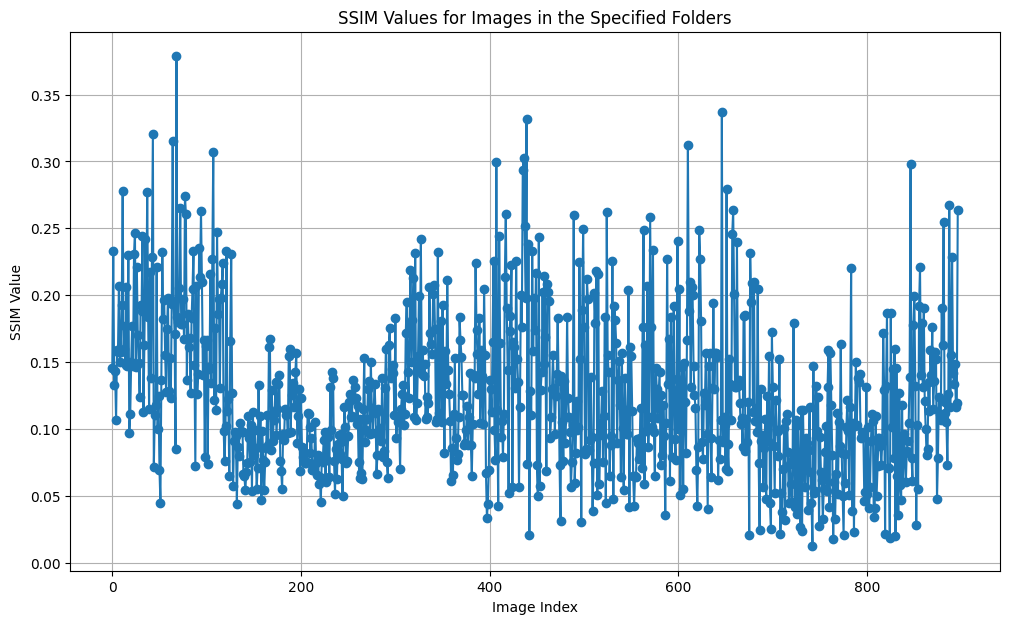

In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

def load_image_paths_from_folder(folder_path):
    """Load paths of images from a folder."""
    return [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

def compute_ssim_values(folder1_path, folder2_path):
    """Compute SSIM values for images in two folders."""
    real_image_paths = load_image_paths_from_folder(folder1_path)
    generated_image_paths = load_image_paths_from_folder(folder2_path)
    
    # Assuming the two folders have the same number of images
    ssim_values = []
    num_images = min(len(real_image_paths), len(generated_image_paths))
    
    for i in range(num_images):
        real_image = cv2.imread(real_image_paths[i], cv2.IMREAD_GRAYSCALE)
        generated_image = cv2.imread(generated_image_paths[i], cv2.IMREAD_GRAYSCALE)
        
        if real_image is None or generated_image is None:
            print(f"Error loading images {real_image_paths[i]} or {generated_image_paths[i]}")
            continue
        
        # Resize both images to fixed dimensions (256x256 in this case)
        real_image = cv2.resize(real_image, (256, 256))
        generated_image = cv2.resize(generated_image, (256, 256))
        
        ssim_value = compare_ssim(real_image, generated_image)
        ssim_values.append(ssim_value)

    return ssim_values

ssim_values = compute_ssim_values(folder1_path, folder2_path)

# Plotting the SSIM values
plt.figure(figsize=(12, 7))
plt.plot(ssim_values, marker='o')
plt.xlabel('Image Index')
plt.ylabel('SSIM Value')
plt.title('SSIM Values for Images in the Specified Folders')
plt.grid(True)
plt.show()

In [6]:
import os
import numpy as np
import cv2
import tensorflow as tf

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (150, 150))  # Resize to desired input shape
            images.append(img)
    return np.array(images)

# Paths to your folders
folder1_path = "C:/Users/sides/Downloads/bigdata/yes/"
folder2_path = "C:/Users/sides/Downloads/bigdata/generated_images/"

# Load real and generated images
real_images = load_images_from_folder(folder1_path)
generated_images = load_images_from_folder(folder2_path)

# Concatenate real and generated images and create labels (1 for real, 0 for generated)
all_images = np.concatenate((real_images, generated_images))
all_labels = np.concatenate((np.ones(len(real_images)), np.zeros(len(generated_images))))

# Shuffle data
indices = np.arange(all_images.shape[0])
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

# Normalize images
all_images = all_images / 255.0

# Split into training and test sets
split_index = int(0.8 * len(all_images))
train_images, test_images = all_images[:split_index], all_images[split_index:]
train_labels, test_labels = all_labels[:split_index], all_labels[split_index:]

# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Accuracy of the model on test set: {test_accuracy*100:.2f}%")


Epoch 1/20
423/423 [==============================] - 78s 179ms/step - loss: 1.0632 - accuracy: 0.9765 - val_loss: 0.3008 - val_accuracy: 0.9891
Epoch 2/20
423/423 [==============================] - 75s 178ms/step - loss: 0.3806 - accuracy: 0.9882 - val_loss: 0.2227 - val_accuracy: 0.9802
Epoch 3/20
423/423 [==============================] - 75s 177ms/step - loss: 0.3173 - accuracy: 0.9891 - val_loss: 0.1697 - val_accuracy: 0.9941
Epoch 4/20
423/423 [==============================] - 75s 177ms/step - loss: 0.1858 - accuracy: 0.9919 - val_loss: 0.3548 - val_accuracy: 0.9893
Epoch 5/20
423/423 [==============================] - 80s 188ms/step - loss: 0.1642 - accuracy: 0.9941 - val_loss: 0.2099 - val_accuracy: 0.9929
Epoch 6/20
423/423 [==============================] - 78s 183ms/step - loss: 0.1135 - accuracy: 0.9947 - val_loss: 0.0420 - val_accuracy: 0.9967
Epoch 7/20
423/423 [==============================] - 79s 187ms/step - loss: 0.0224 - accuracy: 0.9981 - val_loss: 0.0883 - val_ac

In [7]:
import matplotlib.pyplot as plt

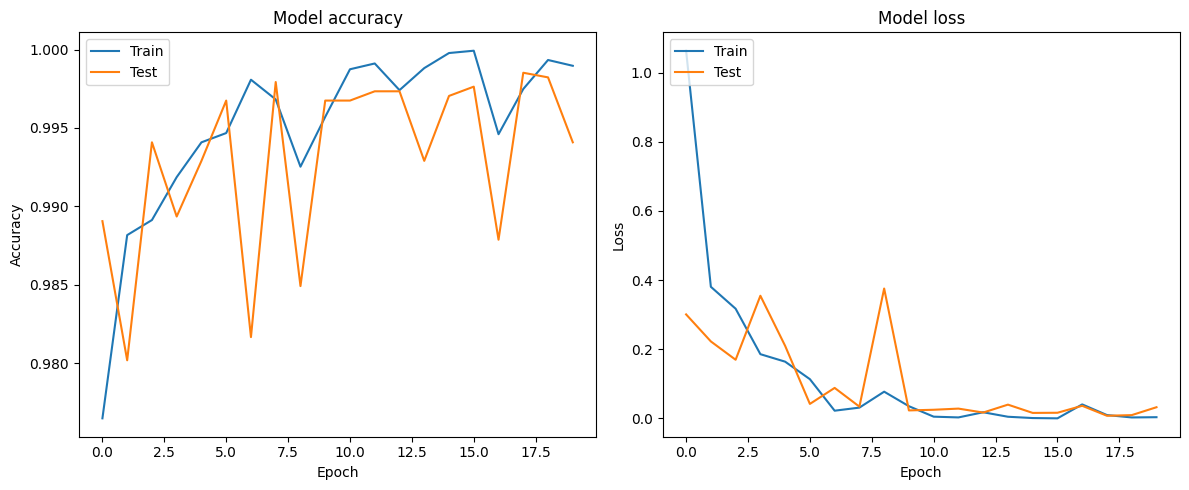

In [8]:
# Plot accuracy curve
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (150, 150))  # Resize to desired input shape
            images.append(img)
    return np.array(images)

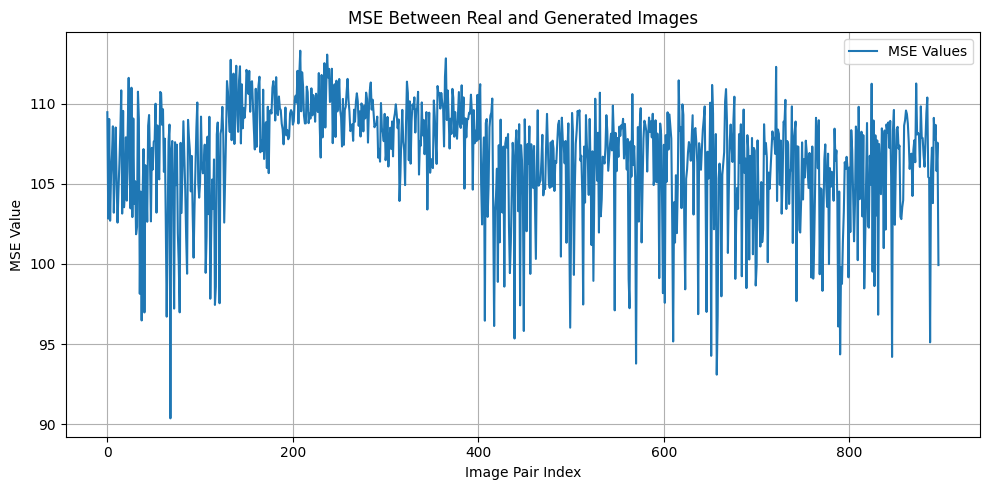

In [11]:

def compute_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# Load real and generated images
real_images = load_images_from_folder(folder1_path)
generated_images = load_images_from_folder(folder2_path)

# Get the minimum number of images from both folders
min_num_images = min(len(real_images), len(generated_images))

# Compute MSE for each image pair up to the minimum number of images
mse_values = [compute_mse(real_images[i], generated_images[i]) for i in range(min_num_images)]

# Plotting the MSE values
plt.figure(figsize=(10, 5))
plt.plot(mse_values, label='MSE Values')
plt.xlabel('Image Pair Index')
plt.ylabel('MSE Value')
plt.title('MSE Between Real and Generated Images')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import os
import shutil

def balance_image_folders(folder1_path, folder2_path):
    # Get the list of images in each folder
    images1 = os.listdir(folder1_path)
    images2 = os.listdir(folder2_path)

    # Calculate the difference in the number of images
    diff = len(images1) - len(images2)

    if diff > 0:
        # Folder 1 has more images, so move excess images from folder 1 to folder 2
        images_to_move = images1[:diff]
        for image in images_to_move:
            src_path = os.path.join(folder1_path, image)
            dst_path = os.path.join(folder2_path, image)
            shutil.move(src_path, dst_path)
    elif diff < 0:
        # Folder 2 has more images, so move excess images from folder 2 to folder 1
        images_to_move = images2[:abs(diff)]
        for image in images_to_move:
            src_path = os.path.join(folder2_path, image)
            dst_path = os.path.join(folder1_path, image)
            shutil.move(src_path, dst_path)
balance_image_folders(folder1_path, folder2_path)

In [17]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))  # Resize to VGG16 input shape
            images.append(img)
    return np.array(images)

In [18]:
def perceptual_loss(y_true, y_pred):
    y_true = preprocess_input(y_true)
    y_pred = preprocess_input(y_pred)
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    model = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv3').output)
    return tf.keras.losses.MSE(model(y_true), model(y_pred))

In [19]:
# Load real and generated images
real_images = load_images_from_folder(folder1_path)
generated_images = load_images_from_folder(folder2_path)

# Ensure the same number of images in both folders
assert len(real_images) == len(generated_images), "Different number of images in folders."

# Compute perceptual loss for each image pair
loss_values = [perceptual_loss(real_images[i:i+1], generated_images[i:i+1]).numpy() for i in range(len(real_images))]

# Plotting the perceptual loss values
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Perceptual Loss Values')
plt.xlabel('Image Pair Index')
plt.ylabel('Perceptual Loss Value')
plt.title('Perceptual Loss Between Real and Generated Images')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 